<a href="https://colab.research.google.com/github/Arulraj1993/Resume_Parser/blob/master/Copy_of_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Import Needed package for authentication
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
#Authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#Get the file
downloaded = drive.CreateFile({'id':'18uTuZz2-dcisao_DQxhxrkwB-7h9LXcn'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Amazon_Unlocked_Mobile.csv') 

In [5]:
#Read data
import pandas as pd
mobile_data = pd.read_csv('Amazon_Unlocked_Mobile.csv') 
for col in mobile_data.columns:
  print(col)
print("Mobile Data Read Successfully!!")
mobile_data.head()

Product Name
Brand Name
Price
Rating
Reviews
Review Votes
Mobile Data Read Successfully!!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [6]:
#Get reviews
mobile_data['Reviews'].astype(str)
review=mobile_data["Reviews"]
review.astype(str)
print(review)


0         I feel so LUCKY to have found this used (phone...
1         nice phone, nice up grade from my pantach revu...
2                                              Very pleased
3         It works good but it goes slow sometimes but i...
4         Great phone to replace my lost phone. The only...
                                ...                        
413835                       another great deal great price
413836                                                   Ok
413837          Passes every drop test onto porcelain tile!
413838    I returned it because it did not meet my needs...
413839    Only downside is that apparently Verizon no lo...
Name: Reviews, Length: 413840, dtype: object


In [7]:
#Get ratings
rating=mobile_data["Rating"]
print(rating)

0         5
1         4
2         5
3         4
4         4
         ..
413835    5
413836    3
413837    5
413838    3
413839    4
Name: Rating, Length: 413840, dtype: int64


In [8]:
#check whether tha dataset is imbalanced or not?
count=[0,0,0,0,0]
for i in rating:
  if(i==1):
    count[0]+=1;
  elif(i==2):
    count[1]+=1;
  elif(i==3):
    count[2]+=1;
  elif(i==4):
    count[3]+=1;
  else:
    count[4]+=1;
print("All Rating count: ",count)

All Rating count:  [72350, 24728, 31765, 61392, 223605]


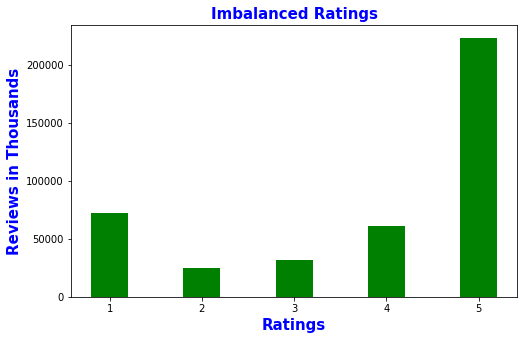

In [9]:
#Proof for imbalanced dataset
import matplotlib.pyplot as plt
# creating the data points 
ratings_data = {'1':count[0], '2':count[1], '3':count[2],'4':count[3], '5':count[4]}
x = list(ratings_data.keys()) 
y = list(ratings_data.values()) 
   
fig = plt.figure(figsize = (8, 5)) 
  
# creating the bar plot 
plt.bar(x, y, color ='green',  
        width = 0.4) 
  
plt.xlabel("Ratings",fontsize = 15, fontweight ='bold', 
             color ='blue') 
plt.ylabel("Reviews in Thousands",fontsize = 15, fontweight ='bold', 
             color ='blue') 
plt.title("Imbalanced Ratings",fontsize = 15, fontweight ='bold', 
             color ='blue') 
plt.show() 



In [10]:
#data preprocessing
#step-1.Lower Casing
review=review.str.lower()
print("Reviews in Lower Case\n",review)

Reviews in Lower Case
 0         i feel so lucky to have found this used (phone...
1         nice phone, nice up grade from my pantach revu...
2                                              very pleased
3         it works good but it goes slow sometimes but i...
4         great phone to replace my lost phone. the only...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837          passes every drop test onto porcelain tile!
413838    i returned it because it did not meet my needs...
413839    only downside is that apparently verizon no lo...
Name: Reviews, Length: 413840, dtype: object


In [11]:
#data preprocessing
#step-2. Handling missing values
cnt=0
for i in range(0,len(review)):
  if type(review[i])!=str:
    cnt+=1
    if rating[i]==1:
      review[i]="I hate this product"
    elif rating[i]==2:
      review[i]="I don't like this product"
    elif rating[i]==3:
      review[i]="This product is moderate"
    elif rating[i]==4:
      review[i]="I like this product"
    else:
      review[i]="I loved this product"
    
print("Number of missing values replaced =",cnt)
print(review)


Number of missing values replaced = 61
0         i feel so lucky to have found this used (phone...
1         nice phone, nice up grade from my pantach revu...
2                                              very pleased
3         it works good but it goes slow sometimes but i...
4         great phone to replace my lost phone. the only...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837          passes every drop test onto porcelain tile!
413838    i returned it because it did not meet my needs...
413839    only downside is that apparently verizon no lo...
Name: Reviews, Length: 413840, dtype: object


In [12]:
#data preprocessing
#step-3.Removing punctuations
import string
for i in range(0,len(review)):
  review[i]=[char for char in review[i] if char not in string.punctuation]
  review[i]=''.join(review[i])
print('After removing punctuations\n',review)


After removing punctuations
 0         i feel so lucky to have found this used phone ...
1         nice phone nice up grade from my pantach revue...
2                                              very pleased
3         it works good but it goes slow sometimes but i...
4         great phone to replace my lost phone the only ...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837           passes every drop test onto porcelain tile
413838    i returned it because it did not meet my needs...
413839    only downside is that apparently verizon no lo...
Name: Reviews, Length: 413840, dtype: object


In [13]:
#data preprocessing
#step-4.stop words removal
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
filtered_review=[]
for i in range(0,len(review)):
  word_tokens=word_tokenize(review[i])
  temp=[]
  for w in word_tokens:
    if w not in stop_words:
      temp.append(w)
  if temp==[]:
    #print("empty line",line)
    if rating[i]==1:
      filtered_review.append("hate product")
    elif rating[i]==2:
      filtered_review.append("don't like product")
    elif rating[i]==3:
      filtered_review.append("product moderate")
    elif rating[i]==4:
      filtered_review.append("like product")
    else:
      filtered_review.append("loved product")
  else:
    str_convert=" ".join(temp)
    filtered_review.append(str_convert)
review=pd.DataFrame(filtered_review)
review=review[0]
print("After Removing Stopwords\n",review,end="\n")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
After Removing Stopwords
 0         feel lucky found used phone us not used hard p...
1         nice phone nice grade pantach revue clean set ...
2                                                   pleased
3            works good goes slow sometimes good phone love
4         great phone replace lost phone thing volume bu...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837           passes every drop test onto porcelain tile
413838    returned not meet needs seemed good selection ...
413839    downside apparently verizon longer uses vcast ...
Name: 0, Length: 413840, dtype: object


In [14]:
#data preprocessing
#step-5 Lemmatization
# import these modules 
import nltk
import re
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer=WordNetLemmatizer()
after_lemma=[]
for i in range(0,len(review)):
  try:
    tokenization=nltk.word_tokenize(review[i])  #handling exception for non string reviews
    temp=[]
    for word in tokenization:
      temp.append(wordnet_lemmatizer.lemmatize(word))
    s=" ".join(temp)
    after_lemma.append(s)
  except Exception:
    print('')
Lemmatized_Reviews=pd.DataFrame(after_lemma)
Lemmatized_Reviews=Lemmatized_Reviews[0]
print('After Lemmatizaation\n',Lemmatized_Reviews)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
After Lemmatizaation
 0         feel lucky found used phone u not used hard ph...
1         nice phone nice grade pantach revue clean set ...
2                                                   pleased
3               work good go slow sometimes good phone love
4         great phone replace lost phone thing volume bu...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837             pass every drop test onto porcelain tile
413838    returned not meet need seemed good selection o...
413839    downside apparently verizon longer us vcast mu...
Name: 0, Length: 413840, dtype: object


In [15]:
#data preprocessing
#step-6.TOKENIZATION
import nltk 
import re 
import numpy as np 
from nltk.tokenize import word_tokenize 
TokenizedReviews=[]
for line in Lemmatized_Reviews:
  temp=re.sub(r'\W', ' ',line)
  temp=re.sub(r'\s+', ' ',line) 
  TokenizedReviews.append(temp)
TokenizedReviews=pd.DataFrame(TokenizedReviews)
TokenizedReviews=TokenizedReviews[0]
print(TokenizedReviews)



0         feel lucky found used phone u not used hard ph...
1         nice phone nice grade pantach revue clean set ...
2                                                   pleased
3               work good go slow sometimes good phone love
4         great phone replace lost phone thing volume bu...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837             pass every drop test onto porcelain tile
413838    returned not meet need seemed good selection o...
413839    downside apparently verizon longer us vcast mu...
Name: 0, Length: 413840, dtype: object


In [16]:
#data preprocessing
#step 7-Bag of words
# Creating the Bag of Words model 
import operator
word2count = {} 
for line in TokenizedReviews: 
	words = nltk.word_tokenize(line) 
	for word in words: 
		if word not in word2count.keys(): 
			word2count[word] = 1
		else: 
			word2count[word] += 1
sorted_dict= dict(sorted(word2count.items(), key=operator.itemgetter(1),reverse=False))
print("\nFrequency count\n")
for k,v in sorted_dict.items():
	print(k,v)



Streaming output truncated to the last 5000 lines.
empresa 81
levanta 81
mytouch 81
challenging 81
coating 81
env3 81
scratching 82
signature 82
accommodate 82
wave 82
pity 82
judge 82
completly 82
converted 82
peice 82
sim1 82
3x 82
exclusive 82
landed 82
p8 82
preorder 82
apologize 82
blog 82
observation 82
inconsistent 82
financial 82
chunk 82
inoperable 82
bless 82
assigned 82
worker 82
congratulation 82
horror 82
repackaged 82
prefect 82
abused 82
evidence 82
detalle 82
tipo 82
proveedor 82
disappears 82
processed 82
crushed 82
advertises 82
13th 82
pickup 82
individually 82
ounce 82
mounted 82
thorough 83
economic 83
simplest 83
relief 83
sharpness 83
equalizer 83
nocontract 83
circumstance 83
fond 83
theory 83
blutooth 83
dealbreaker 83
funky 83
descent 83
hooking 83
aka 83
proceeded 83
caracas 83
twist 83
examine 83
satisfying 83
seat 83
harsh 83
surrounding 83
mala 83
enviaron 83
fatal 83
confirmation 84
discovering 84
jumped 84
heartbeat 84
fasti 84
extent 84
goodbut 84
surro

In [17]:
#Multinomial Naive Bayes Classifier for Text Analysis
#import libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [18]:
#Multinomial Naive Bayes Classifier for Text Analysis
#Training label
count=[0,0,0,0,0]
for i in rating:
  if(i==1):
    count[0]+=1;
  elif(i==2):
    count[1]+=1;
  elif(i==3):
    count[2]+=1;
  elif(i==4):
    count[3]+=1;
  else:
    count[4]+=1;
print("All Rating count: ",count)
result={}
total=sum(count)
#Divide the count of each class by total documents 
for i in range(0,len(count)):
    result[i]=count[i]/total
    
print("Probability of each class:")
for k, v in result.items():
  print(k+1,"=",v)

All Rating count:  [72350, 24728, 31765, 61392, 223605]
Probability of each class:
1 = 0.17482601971776532
2 = 0.05975256137637734
3 = 0.07675671757200851
4 = 0.14834718731877053
5 = 0.5403175140150783


In [19]:
# alternative: read file into pandas from a URL
import pandas as pd
mobile_data['Reviews']=TokenizedReviews
mycolumns = ['Reviews','Rating'] 
mobile_data=mobile_data[mycolumns]
mobile_data=mobile_data
# examine the shape
print(mobile_data.shape)


(413840, 2)


In [20]:
# convert label to a numerical variable
mobile_data['label_num'] = mobile_data.Rating.map({5:5,4:4,3:3,2:2,1:1})
# check that the conversion worked
mobile_data.head()

,Reviews,Rating,label_num
0,feel lucky found used phone u not used hard ph...,5,5
1,nice phone nice grade pantach revue clean set ...,4,4
2,pleased,5,5
3,work good go slow sometimes good phone love,4,4
4,great phone replace lost phone thing volume bu...,4,4


In [21]:
# how to define X and y (from the mobile data) for use with COUNTVECTORIZER
X = mobile_data.Reviews
y = mobile_data.Rating
print(X.shape)
print(y.shape)

(413840,)
(413840,)


In [22]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(310380,)
(103460,)
(310380,)
(103460,)


In [23]:
# 2. instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [24]:
# learn training data vocabulary, then use it to create a document-term matrix

# 3. fit
vect.fit(X_train)

# 4. transform training data
X_train_dtm = vect.transform(X_train)

In [25]:
# examine the document-term matrix
X_train_dtm

<310380x110584 sparse matrix of type '<class 'numpy.int64'>'
	with 5524535 stored elements in Compressed Sparse Row format>

In [26]:
# 4. transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

# you can see that the number of columns, 7456, is the same as what we have learned above in X_train_dtm

<103460x110584 sparse matrix of type '<class 'numpy.int64'>'
	with 1830680 stored elements in Compressed Sparse Row format>

In [27]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [28]:
# 3. train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 159 ms, sys: 1.91 ms, total: 161 ms
Wall time: 162 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [30]:
# calculate accuracy of class predictions
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test, y_pred_class)*100)

Accuracy= 72.30910496810361


In [31]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[15196,   206,   323,   434,  2023],
       [ 2995,  1050,   305,   532,  1228],
       [ 2044,   115,  1735,   996,  3130],
       [ 1088,    56,   276,  3857, 10209],
       [ 1025,    67,   158,  1439, 52973]])

In [32]:
# Model Precision: what percentage of positive tuples are labeled as such?
# Model Recall: what percentage of positive tuples are labelled as such?

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Precision Score : ",precision_score(y_test, y_pred_class,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred_class,average='micro'))
print("F1 Score:",f1_score(y_test,y_pred_class,average='micro'))

Precision Score :  0.7230910496810361
Recall Score :  0.7230910496810361
F1 Score: 0.7230910496810361


In [33]:
# print message text for the false predictions
X_test[y_pred_class != y_test]

251605                                                 good
395623    overall great phone work well like android pho...
184654                                     nice phone money
248213    phone came hdmi port broken phone would say co...
153874                                        speaker issue
                                ...                        
25398                   scratch anticipated still great buy
140216                      not goodbattery performance low
385729    original brightside got wet rainstorm got repl...
197764    love smartphone beautifull lie much happy exce...
18966                                               thank u
Name: Reviews, Length: 28649, dtype: object

In [34]:
X_test='okay screen cracked 1 day'
X_test_dtm = vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
print(y_pred_class)

X_test='i am satisfied for this item'
X_test_dtm = vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
print(y_pred_class)

X_test='worst phone'
X_test_dtm = vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
print(y_pred_class)

X_test='good mobile phone, i loved it'
X_test_dtm = vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
print(y_pred_class)

[1]
[5]
[1]
[5]


In [41]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python#building
from sklearn.metrics import accuracy_score
mobile_data=mobile_data.head(4000)
print(len(mobile_data))
print(np.unique(mobile_data['Rating']))
from sklearn import model_selection,svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(mobile_data['Reviews'],mobile_data['Rating'],test_size=0.3)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Encoder = LabelEncoder()
Tfidf_vect = TfidfVectorizer(max_features=500000)
Tfidf_vect.fit(mobile_data['Reviews'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(Test_Y,predictions_SVM,average='micro'))
print("Recall Score : ",recall_score(Test_Y,predictions_SVM,average='micro'))

4000
[1 2 3 4 5]
SVM Accuracy Score ->  74.91666666666667
Precision Score :  0.7491666666666666
Recall Score :  0.7491666666666666


In [42]:
X_test='okay screen cracked 1 day'
X_test_tfidf = Tfidf_vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = SVM.predict(X_test_tfidf)
print(y_pred_class)

X_test='i am satisfied for this item'
X_test_tfidf = Tfidf_vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = SVM.predict(X_test_tfidf)
print(y_pred_class)

X_test='worst phone'
X_test_tfidf = Tfidf_vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = SVM.predict(X_test_tfidf)
print(y_pred_class)

X_test='good mobile phone, i loved it'
X_test_tfidf = Tfidf_vect.transform([X_test])
# 4. make class predictions for X_test_dtm
y_pred_class = SVM.predict(X_test_tfidf)
print(y_pred_class)

[2]
[4]
[1]
[4]
